### Data Science Blog Post 
*This Project follows the CRISP-DM process (Cross Industry Process for Data Mining).*

CRISP-DM

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modeling
5. Evaluate the Results
6. Deployment

### Business Understanding

The coronavirus COVID-19 pandemic is the defining global health crisis affecting 213 countries and territories around the world and 2 international conveyances. 

Based on the [Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19), I want to find some insights of:

1. The datetime of the cases
2. The evolution of confirmed, recovered, and death cases and the heatmap of cases overtime
3. Top 10 countries with confirmed, recovered, and death cases
4. The age distribution of cases
5. The cases evolution in Vietnam

In [1]:
from pathlib import Path
data_dir = Path(r"..\images")

import os
os.listdir(data_dir)

['image-0.PNG']

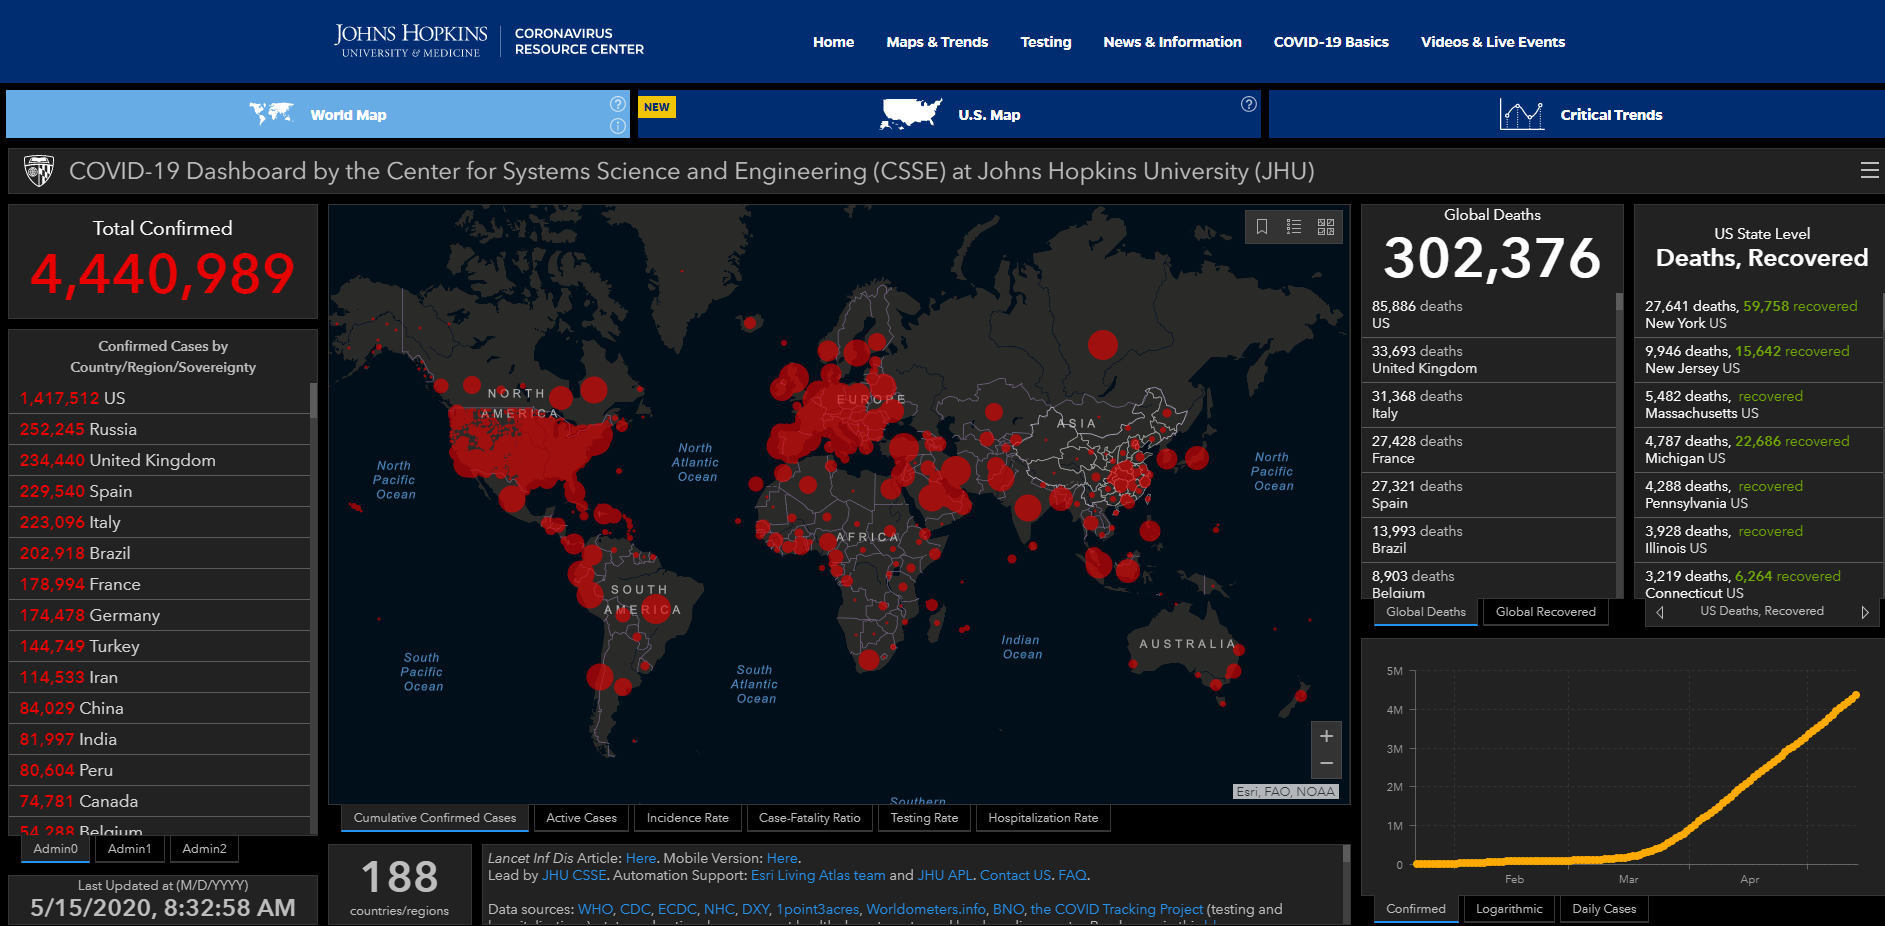

In [2]:
from IPython.display import Image
Image(filename=data_dir/'image-0.PNG')

### Data Understanding
*First Exploratory Data Analysis - EDA*

In [3]:
# Import common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.graph_objects as go
import plotly.express as px

In [4]:
# Load data
PATH = "C:\\Users\\DucDQ1\\Desktop\\Data-Science-Blog-Post-master\\Data-Science-Blog-Post-master\\datasources\\novel-corona-virus-2019-dataset\\"

df_covid19 = pd.read_csv(PATH + 'covid_19_data.csv', date_parser=['Last Update'])
df_confirmed = pd.read_csv(PATH + 'time_series_covid_19_confirmed.csv')
df_recovered = pd.read_csv(PATH + 'time_series_covid_19_recovered.csv')
df_deaths = pd.read_csv(PATH + 'time_series_covid_19_deaths.csv')

In [5]:
# Check null values data
df_covid19.isnull().any()

SNo                False
ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

In [6]:
# Check with null rows
df_covid19[df_covid19.isnull().any(axis=1)]

SNo ObservationDate Province/State      Country/Region  \
35        36      01/22/2020            NaN               Japan   
36        37      01/22/2020            NaN            Thailand   
37        38      01/22/2020            NaN         South Korea   
73        74      01/23/2020            NaN               Japan   
74        75      01/23/2020            NaN            Thailand   
...      ...             ...            ...                 ...   
24306  24307      05/13/2020            NaN  West Bank and Gaza   
24307  24308      05/13/2020            NaN      Western Sahara   
24308  24309      05/13/2020            NaN               Yemen   
24309  24310      05/13/2020            NaN              Zambia   
24310  24311      05/13/2020            NaN            Zimbabwe   

               Last Update  Confirmed  Deaths  Recovered  
35         1/22/2020 17:00        2.0     0.0        0.0  
36         1/22/2020 17:00        2.0     0.0        0.0  
37         1/22/2020 17:00        1.0     0.0        0.0  
73           1/23/20 17:00        1.0     0.0        0.0  
74           1/23/20 17:00        3.0     0.0        0.0  
...                    ...        ...     ...        ...  
24306  2020-05-14 03:32:28      375.0     2.0      310.0  
24307  2020-05-14 03:32:28        6.0     0.0        6.0  
24308  2020-05-14 03:32:28       70.0    12.0        1.0  
24309  2020-05-14 03:32:28      446.0     7.0      124.0  
24310  2020-05-14 03:32:28       37.0     4.0       12.0  

[12745 rows x 8 columns]

In [7]:
df_confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  \
0        0        0        0  ...    2894    3224    3392    3563    3778   
1        0        0        0  ...     803     820     832     842     850   
2        0        0        0  ...    4648    4838    4997    5182    5369   
3        0        0        0  ...     750     751     751     752     752   
4        0        0        0  ...      35      36      36      36      43   

   5/9/20  5/10/20  5/11/20  5/12/20  5/13/20  
0    4033     4402     4687     4963     5226  
1     856      868      872      876      880  
2    5558     5723     5891     6067     6253  
3     754      755      755      758      760  
4      43       45       45       45       45  

[5 rows x 117 columns]

### Answering the first question: The dates of the cases

In [8]:
# Earliest cases with the current dataset
df_covid19.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

What is the first date of case in the dataset: Jan 22, 2020

In [9]:
# Latest cases with the current dataset
df_covid19.tail()

SNo ObservationDate Province/State  Country/Region  \
24446  24447      05/13/2020        Wyoming              US   
24447  24448      05/13/2020       Xinjiang  Mainland China   
24448  24449      05/13/2020          Yukon          Canada   
24449  24450      05/13/2020         Yunnan  Mainland China   
24450  24451      05/13/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
24446  2020-05-14 03:32:28      688.0     7.0        0.0  
24447  2020-05-14 03:32:28       76.0     3.0       73.0  
24448  2020-05-14 03:32:28       11.0     0.0        0.0  
24449  2020-05-14 03:32:28      185.0     2.0      183.0  
24450  2020-05-14 03:32:28     1268.0     1.0     1267.0

The latest date in the dataset is May 13, 2020

We can now look at the third step of the process:
### Data Preparation

In [10]:
# Data Cleaning - Columns Renamed
df_covid19.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_covid19['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

### Answering the question: The evolution of confirmed, recovered, and death cases and the heatmap of cases

In [11]:
# The evolution of Covid19 Cases - Confirmed, Deaths, Recovered - Worlwide
confirmed = df_covid19.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df_covid19.groupby('Date').sum()['Deaths'].reset_index()
recovered = df_covid19.groupby('Date').sum()['Recovered'].reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='The Evolution of COVID-19 Cases - Worldwide',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

### The heatmap of cases overtime

In [12]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df_covid19.copy()
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [13]:
fig = px.density_mapbox(df_latlong, 
                        lat="Lat", 
                        lon="Long", 
                        hover_name="Province/State", 
                        hover_data=["Confirmed","Deaths","Recovered"], 
                        animation_frame="Date",
                        color_continuous_scale="Portland",
                        radius=7, 
                        zoom=0, height=700)
fig.update_layout(title='COVID-19 Cases Time Lapse - Worldwide',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                 )
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.show()

### Answering the question: Top 10 countries with confirmed, recovered, and death cases

Text(0.5, 0, 'Recovered')

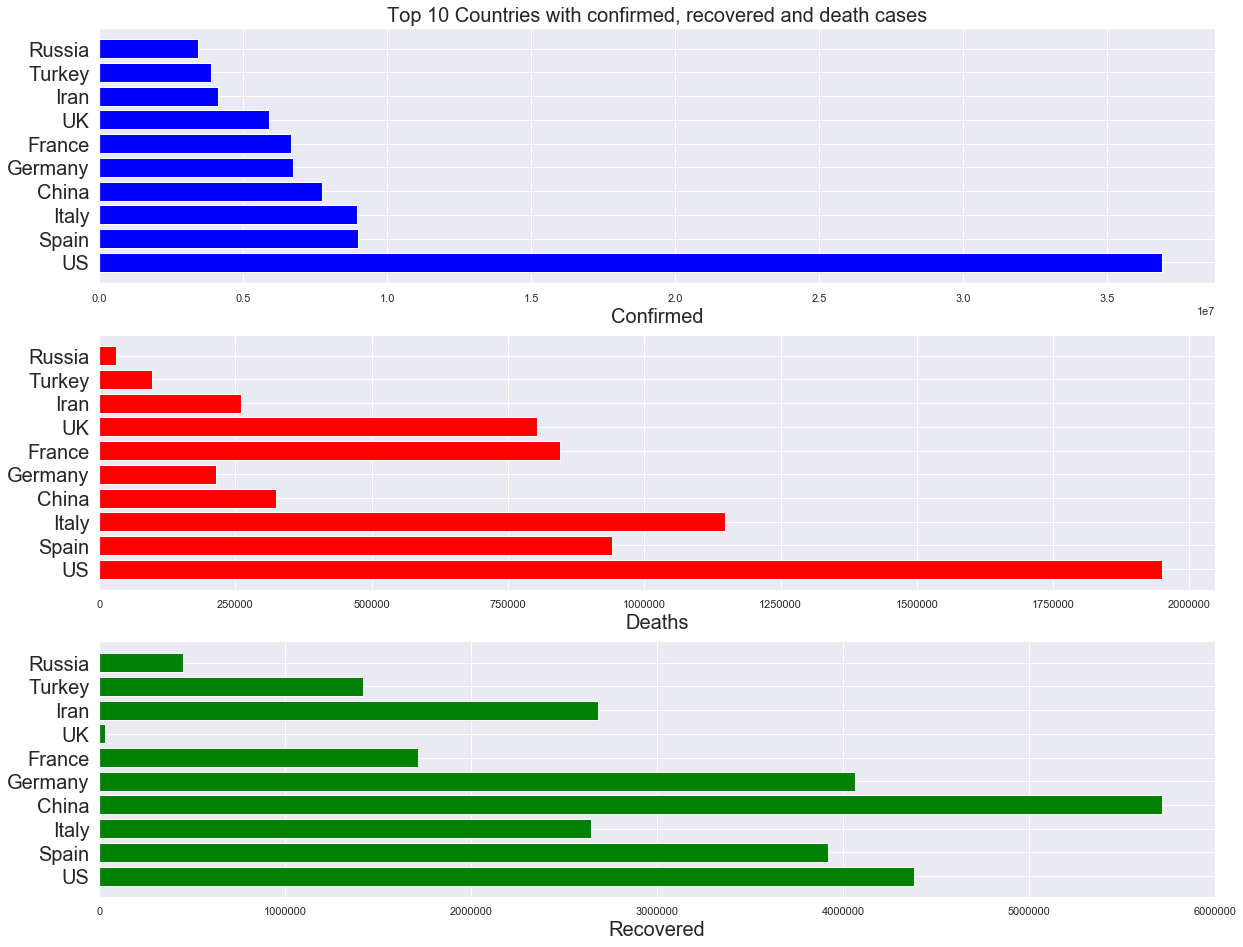

In [14]:
country=df_covid19.groupby(['Country'])[['Confirmed','Recovered','Deaths']].sum()

top_10=country.nlargest(10,['Confirmed'])
plt.figure(figsize=(20,16))
plt.subplot(311)

plt.title('Top 10 Countries with confirmed, recovered and death cases', fontsize=20)
plt.barh(top_10.index,top_10['Confirmed'], color='blue')
plt.yticks(fontsize=20)

plt.xlabel('Confirmed', fontsize=20)
plt.subplot(312)
plt.barh(top_10.index, top_10['Deaths'], color='red')
plt.yticks(fontsize=20)

plt.xlabel('Deaths', fontsize=20)
plt.subplot(313)
plt.barh(top_10.index, top_10['Recovered'], color='green')
plt.yticks(fontsize=20)
plt.xlabel('Recovered', fontsize=20)

### Answering the quesion: The age distrition of cases

In [15]:
data = pd.read_csv(PATH + 'COVID19_line_list_data.csv')
data = data[['id', 'location', 'country', 'gender', 'age', 'death', 'recovered']]
data.head(10)

id             location country  gender   age death recovered
0   1  Shenzhen, Guangdong   China    male  66.0     0         0
1   2             Shanghai   China  female  56.0     0         0
2   3             Zhejiang   China    male  46.0     0         0
3   4              Tianjin   China  female  60.0     0         0
4   5              Tianjin   China    male  58.0     0         0
5   6            Chongqing   China  female  44.0     0         0
6   7              Sichuan   China    male  34.0     0         0
7   8              Beijing   China    male  37.0     0         0
8   9              Beijing   China    male  39.0     0         0
9  10              Beijing   China    male  56.0     0         0

The age distrition of cases

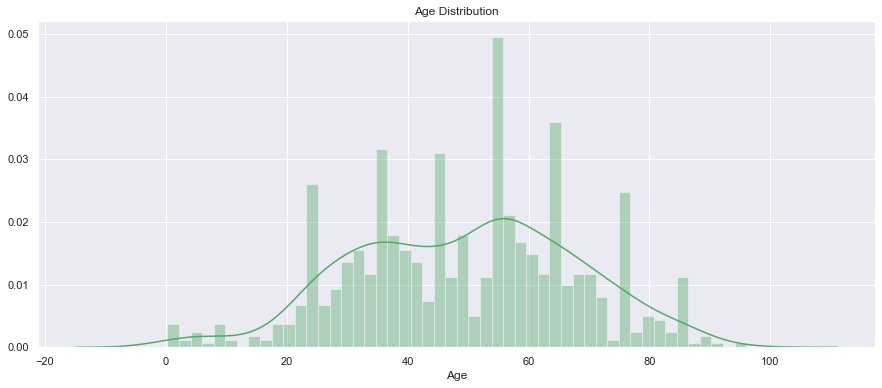

In [16]:
plt.figure(figsize=(15, 6))
sns.distplot(data['age'], rug=False, bins=50, color='g')
plt.title('Age Distribution')
plt.xlabel("Age");
plt.show()

### Answering the question: The Evolution of Cases in Vietnam

In [17]:
# By Country - Vietnam
df_vietnam = df_covid19.query('Country=="Vietnam"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df_vietnam

Date  Confirmed  Deaths  Recovered
0    01/23/2020        2.0     0.0        0.0
1    01/24/2020        2.0     0.0        0.0
2    01/25/2020        2.0     0.0        0.0
3    01/26/2020        2.0     0.0        0.0
4    01/27/2020        2.0     0.0        0.0
..          ...        ...     ...        ...
107  05/09/2020      288.0     0.0      241.0
108  05/10/2020      288.0     0.0      241.0
109  05/11/2020      288.0     0.0      249.0
110  05/12/2020      288.0     0.0      252.0
111  05/13/2020      288.0     0.0      252.0

[112 rows x 4 columns]

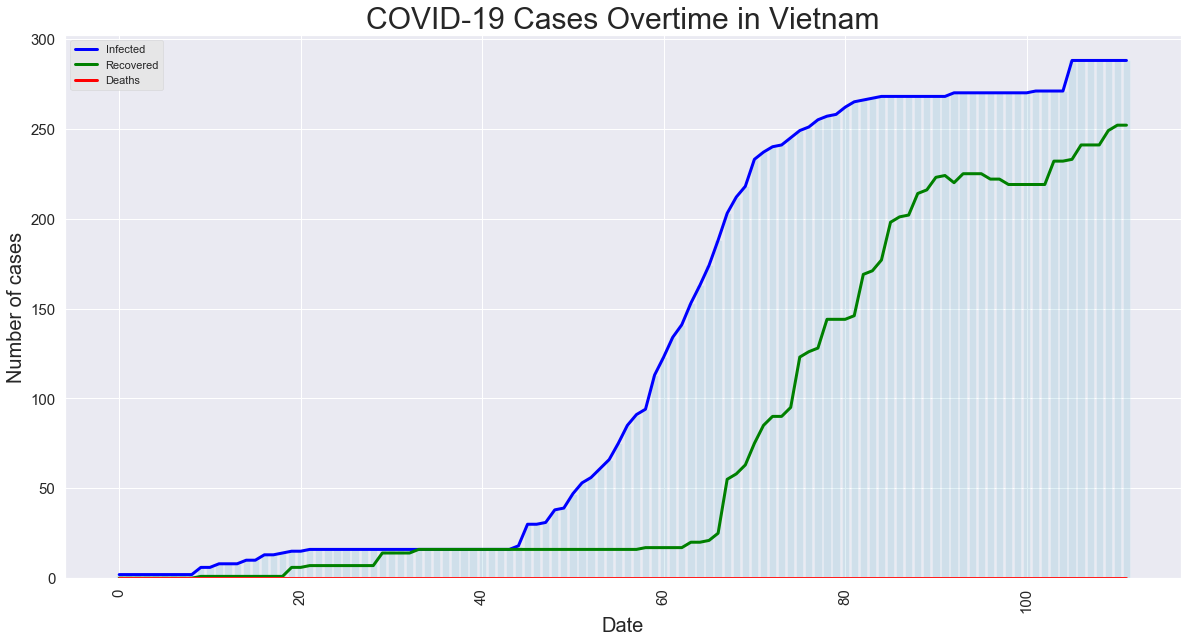

In [18]:
plt.figure(figsize=(20,10))
plt.title('COVID-19 Cases Overtime in Vietnam',fontsize=30)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.plot(df_vietnam.index,df_vietnam['Confirmed'], label='Infected',linewidth=3, color='blue')
plt.plot(df_vietnam.index,df_vietnam['Recovered'], label='Recovered',linewidth=3, color='green')
plt.plot(df_vietnam.index,df_vietnam['Deaths'], label='Deaths', linewidth=3, color='red')
plt.bar(df_vietnam.index,df_vietnam['Confirmed'], alpha=0.2, color='c')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.style.use('ggplot')
plt.legend()

### Data Modeling
When looking at the questions, there is no need to do any predictive modeling. I can use only descriptive and a little inferential statistics to retrieve teh results. Therefore, the step **Data Modeling** in CRISP-DM is not necessary to answer the questions.

### Evaluate the Results

### Deployment

The result is showed in Medium.